In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

C:\Users\sneha\AppData\Local\Temp\ipykernel_18208\4196587217.py:4: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  Base.prepare(engine, reflect=True)


In [7]:
# View all of the classes that automap found
reflected_classes = Base.classes.keys()
for class_name in reflected_classes:
    print(class_name)

measurement
station


In [8]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()[0]
most_recent_date

'2017-08-23'

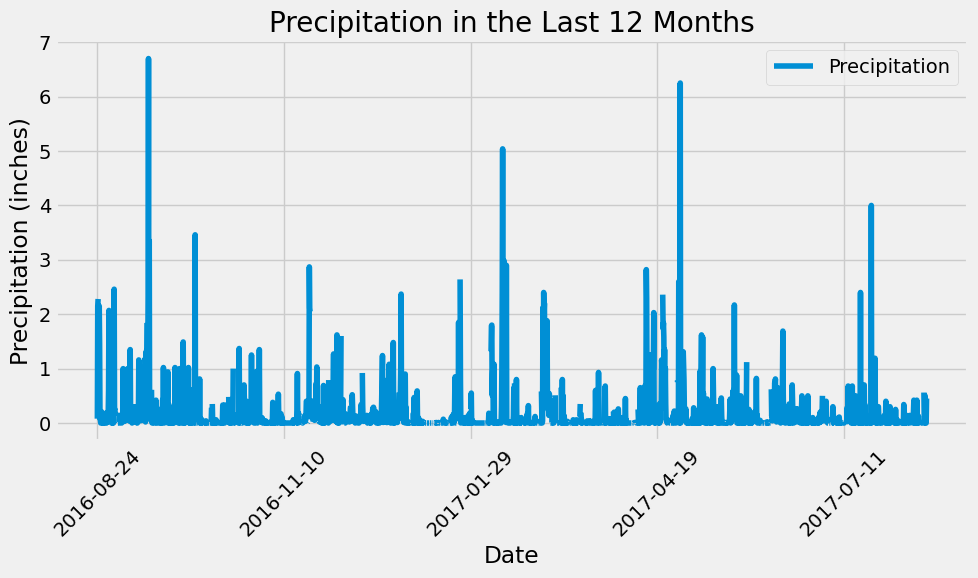

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
import datetime as dt


# Starting from the most recent data point in the database. 
most_recent_date = dt.datetime.strptime(most_recent_date, '%Y-%m-%d')
# Calculate the date one year from the last date in data set.
one_year_ago = most_recent_date - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
precipitation_data = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= one_year_ago).\
    filter(Measurement.date <= most_recent_date).\
    order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df_precipitation = pd.DataFrame(precipitation_data, columns=['Date', 'Precipitation'])

# Sort the dataframe by date
df_precipitation = df_precipitation.sort_values(by='Date')

# Use Pandas Plotting with Matplotlib to plot the data
df_precipitation.plot(x='Date', y='Precipitation', figsize=(10, 6))
plt.title('Precipitation in the Last 12 Months')
plt.xlabel('Date')
plt.ylabel('Precipitation (inches)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [12]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_statistics = df_precipitation.describe()
print(summary_statistics)

       Precipitation
count    2015.000000
mean        0.176462
std         0.460288
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000


# Exploratory Station Analysis

In [13]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(func.count(Station.station)).scalar()

print( total_stations)

9


In [14]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
most_active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
                      group_by(Measurement.station).\
                      order_by((func.count(Measurement.station))).all()

# List the stations and their counts in descending order
for station, count in most_active_stations:
    print(f" {station}, {count}")

 USC00518838, 511
 USC00517948, 1372
 USC00511918, 1979
 USC00514830, 2202
 USC00516128, 2612
 USC00519523, 2669
 USC00513117, 2709
 USC00519397, 2724
 USC00519281, 2772


In [45]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
# Get the most active station id from the previous query
most_active_station_id = most_active_stations[-1][0]

# Calculate the lowest, highest, and average temperature for the most active station
temperature_stats = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
                    filter(Measurement.station == most_active_station_id).all()

# Extract the results
lowest_temp, highest_temp, avg_temp = temperature_stats[0]

print(f"{lowest_temp}")
print(f"{highest_temp}")
print(f"{avg_temp}")

54.0
85.0
71.66378066378067


[(77.0,), (77.0,), (80.0,), (80.0,), (75.0,), (73.0,), (78.0,), (77.0,), (78.0,), (80.0,), (80.0,), (78.0,), (78.0,), (78.0,), (73.0,), (74.0,), (80.0,), (79.0,), (77.0,), (80.0,), (76.0,), (79.0,), (75.0,), (79.0,), (78.0,), (79.0,), (78.0,), (78.0,), (76.0,), (74.0,), (77.0,), (78.0,), (79.0,), (79.0,), (77.0,), (80.0,), (78.0,), (78.0,), (78.0,), (77.0,), (79.0,), (79.0,), (79.0,), (79.0,), (75.0,), (76.0,), (73.0,), (72.0,), (71.0,), (77.0,), (79.0,), (78.0,), (79.0,), (77.0,), (79.0,), (77.0,), (78.0,), (78.0,), (78.0,), (78.0,), (77.0,), (74.0,), (75.0,), (76.0,), (73.0,), (76.0,), (74.0,), (77.0,), (76.0,), (76.0,), (74.0,), (75.0,), (75.0,), (75.0,), (75.0,), (71.0,), (63.0,), (70.0,), (68.0,), (67.0,), (77.0,), (74.0,), (77.0,), (76.0,), (76.0,), (75.0,), (76.0,), (75.0,), (73.0,), (75.0,), (73.0,), (75.0,), (74.0,), (75.0,), (74.0,), (75.0,), (73.0,), (75.0,), (73.0,), (73.0,), (74.0,), (70.0,), (72.0,), (70.0,), (67.0,), (67.0,), (69.0,), (70.0,), (68.0,), (69.0,), (69.0,), 

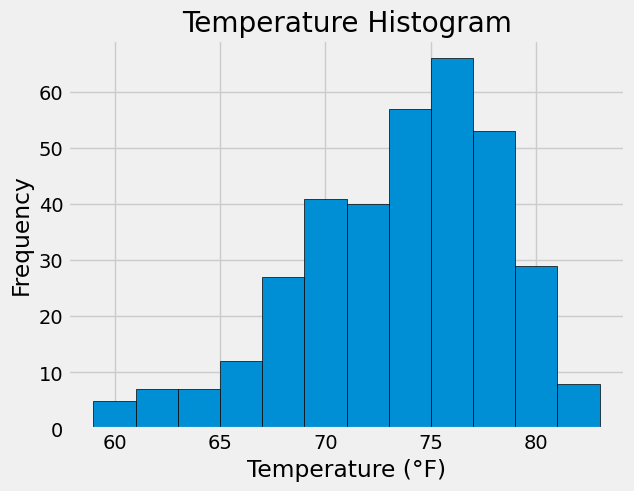

In [47]:
# Using the most active station id
most_active_station_id = most_active_stations[-1][0]
# Calculate the date one year from the most recent date
most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()[0]
most_recent_date = dt.datetime.strptime(most_recent_date, '%Y-%m-%d').date()
one_year_ago = most_recent_date - dt.timedelta(days=365)

# Query the TOBS data for the most active station for the previous 12 months
temperature_data = session.query(Measurement.tobs).\
    filter(Measurement.station == most_active_station_id).\
    filter(Measurement.date >= one_year_ago).\
    filter(Measurement.date <= most_recent_date).all()
print(temperature_data)

# Save the query results as a Pandas DataFrame
temperatures = [temp[0] for temp in temperature_data]

# Plot the results as a histogram with bins=12
plt.hist(temperatures, bins=12, edgecolor='black')
plt.xlabel('Temperature (°F)')
plt.ylabel('Frequency')
plt.title('Temperature Histogram')
plt.grid(True)
plt.show()

In [44]:
most_active_station_id, one_year_ago, most_recent_date

('USC00518838', datetime.date(2016, 8, 23), datetime.date(2017, 8, 23))

# Close Session

In [40]:
temperature_data

[]

In [20]:
# Close Session
session.close()